# Clasificación de datos planares con una capa oculta

Bienvenido a tu tarea de programación de la semana 3. Es hora de construir tu primera red neuronal, que tendrá una capa oculta. Ahora, notarás una gran diferencia entre este modelo y el que implementaste anteriormente usando la regresión logística.

Al final de esta tarea, serás capaz de

- Implementar una red neuronal de clasificación de 2 clases con una sola capa oculta
- Utilizar unidades con una función de activación no lineal, como tanh
- Calcular la pérdida de entropía cruzada
- Implementar la propagación hacia delante y hacia atrás



Antes de enviar su tarea, asegúrese de que no está haciendo lo siguiente

1. No ha añadido ninguna declaración _extra_ `print` en la tarea.
2. No ha añadido ninguna celda de código _extra_ en la tarea.
3. No ha cambiado ningún parámetro de la función.
4. No ha utilizado ninguna variable global dentro de sus ejercicios calificados. A menos que se le indique específicamente que lo haga, por favor absténgase de hacerlo y utilice las variables locales en su lugar.
5. No está cambiando el código de asignación donde no es necesario, como la creación de variables _extra_.



## Índice de contenidos
- [1 - Packages](#1)
- [2 - Load the Dataset](#2)
    - [Exercise 1](#ex-1)
- [3 - Simple Logistic Regression](#3)
- [4 - Neural Network model](#4)
    - [4.1 - Defining the neural network structure](#4-1)
        - [Exercise 2 - layer_sizes](#ex-2)
    - [4.2 - Initialize the model's parameters](#4-2)
        - [Exercise 3 - initialize_parameters](#ex-3)
    - [4.3 - The Loop](#4-3)
        - [Exercise 4 - forward_propagation](#ex-4)
    - [4.4 - Compute the Cost](#4-4)
        - [Exercise 5 - compute_cost](#ex-5)
    - [4.5 - Implement Backpropagation](#4-5)
        - [Exercise 6 - backward_propagation](#ex-6)
    - [4.6 - Update Parameters](#4-6)
        - [Exercise 7 - update_parameters](#ex-7)
    - [4.7 - Integration](#4-7)
        - [Exercise 8 - nn_model](#ex-8)
- [5 - Test the Model](#5)
    - [5.1 - Predict](#5-1)
        - [Exercise 9 - predict](#ex-9)
    - [5.2 - Test the Model on the Planar Dataset](#5-2)
- [6 - Tuning hidden layer size (optional/ungraded exercise)](#6)
- [7- Performance on other datasets](#7)

<a name='1'></a>
# 1 - Paquetes

Primero importa todos los paquetes que necesitarás durante esta tarea.

- numpy](https://www.numpy.org/) es el paquete fundamental para la computación científica con Python.
- sklearn](http://scikit-learn.org/stable/) proporciona herramientas simples y eficientes para la minería y el análisis de datos. 
- matplotlib](http://matplotlib.org) es una biblioteca para trazar gráficos en Python.
- testCases proporciona algunos ejemplos de prueba para evaluar la corrección de sus funciones
- planar_utils proporciona varias funciones útiles utilizadas en esta tarea

In [219]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
# 2 - Cargar Dataset 



In [220]:
X, Y = load_planar_dataset()

Visualiza el conjunto de datos utilizando matplotlib. Los datos parecen una "flor" con algunos puntos rojos (etiqueta y=0) y otros azules (y=1). Tu objetivo es construir un modelo que se ajuste a estos datos. En otras palabras, queremos que el clasificador defina las regiones como rojas o azules.

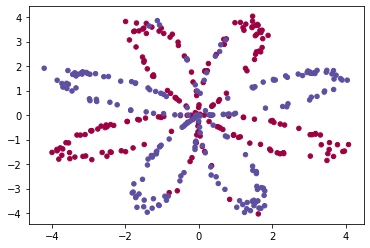

In [221]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)

Tienes
    - una matriz numpy X que contiene tus características (x1, x2)
    - una matriz numpy (vector) Y que contiene tus etiquetas (rojo:0, azul:1).

Primero, hazte una idea de cómo son tus datos. 

<a name='ex-1'></a>
### Ejercicio 1 

¿Cuántos ejemplos de entrenamiento tienes? Además, ¿cuál es la "forma" de las variables "X" y "Y"? 

**Pista**: ¿Cómo se obtiene la forma de un array de numpy? [(ayuda)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [248]:
# (≈ 3 lines of code)
# shape_X = ...
# shape_Y = ...
# training set size
# m = ...
# YOUR CODE STARTS HERE
shape_X=np.shape(X)
shape_Y=np.shape(Y)

m=shape_X[1]
# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)
I have m = 200 training examples!


**Salida esperada**:
       
<table style="width:20%">
  <tr>
    <td> shape of X </td>
    <td> (2, 400) </td> 
  </tr>
  <tr>
    <td>shape of Y</td>
    <td>(1, 400) </td> 
    </tr>
    <tr>
    <td>m</td>
    <td> 400 </td> 
  </tr>
</table>

<a name='3'></a>
## 3 - Regresión logística simple

Antes de construir una red neuronal completa, vamos a comprobar cómo funciona la regresión logística en este problema. Para ello, puede utilizar las funciones incorporadas de sklearn. Ejecute el siguiente código para entrenar un clasificador de regresión logística en el conjunto de datos.

In [249]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

d:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Ahora puede trazar la frontera de decisión de estos modelos. Ejecute el código siguiente.

Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


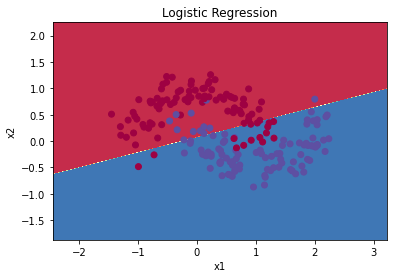

In [250]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Salida esperada**:

<table style="width:20%">
  <tr>
    <td>Accuracy</td>
    <td> 47% </td> 
  </tr>
  
</table>


**Interpretación**: El conjunto de datos no es linealmente separable, por lo que la regresión logística no funciona bien. Esperemos que una red neuronal lo haga mejor. ¡Probemos esto ahora! 

<a name='4'></a>
## 4 - Modelo de red neuronal

La regresión logística no funcionó bien en el conjunto de datos de las flores. A continuación, vas a entrenar una Red Neuronal con una sola capa oculta y verás cómo maneja el mismo problema.

**El modelo:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Matemáticamente**:

Por ejemplo $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Dadas las predicciones sobre todos los ejemplos, también se puede calcular el coste $J$ de la siguiente manera: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Recordatorio**: La metodología general para construir una Red Neuronal es:
    1. Definir la estructura de la red neuronal ( # de unidades de entrada, # de unidades ocultas, etc). 
    2. Inicializar los parámetros del modelo
    3. Bucle:
        - Implementar la propagación hacia adelante
        - Calcular las pérdidas
        - Implementar la propagación hacia atrás para obtener los gradientes
        - Actualizar los parámetros (descenso del gradiente)

En la práctica, a menudo se construyen funciones de ayuda para calcular los pasos 1 a 3, y luego se combinan en una función llamada `nn_model()`. Una vez que haya construido `nn_model()` y haya aprendido los parámetros correctos, podrá hacer predicciones sobre nuevos datos.

<a name='4-1'></a>
### 4.1 - Definir la estructura de la red neuronal ####

<a name='ex-2'></a>
### Ejercicio 2 - layer_sizes 

Definir tres variables:
    - n_x: el tamaño de la capa de entrada
    - n_h: el tamaño de la capa oculta (**ponlo a 4, sólo para este Ejercicio 2**) 
    - n_y: el tamaño de la capa de salida

**Sugerencia**: Utilice las formas de X e Y para encontrar n_x y n_y. Además, codifique el tamaño de la capa oculta para que sea 4.

In [251]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    #(≈ 3 lines of code)
    # n_x = ... 
    # n_h = ...
    # n_y = ... 
    # YOUR CODE STARTS HERE
    n_x=np.shape(X)[0]
    n_h=4
    n_y=np.shape(Y)[0]
    
    # YOUR CODE ENDS HERE
    return (n_x, n_h, n_y)

In [252]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

layer_sizes_test(layer_sizes)

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2
All tests passed!


***El resultado esperado es el siguiente:...
```
El tamaño de la capa de entrada es: n_x = 5
El tamaño de la capa oculta es: n_h = 4
El tamaño de la capa de salida es: n_y = 2
Todas las pruebas superadas.
 Todas las pruebas superadas.
```

<a name='4-2'></a>
### 4.2 - Inicializar los parámetros del modelo ####

<a name='ex-3'></a>
### Ejercicio 3 - inicializar_parámetros

Implementa la función `inicializar_parámetros()`.

**Instrucciones**:
- Asegúrate de que el tamaño de tus parámetros es el correcto. Consulta la figura de la red neuronal de arriba si es necesario.
- Inicializa las matrices de pesos con valores aleatorios. 
    - Utilice: `np.random.randn(a,b) * 0.01` para inicializar aleatoriamente una matriz de forma (a,b).
- Inicializará los vectores de sesgo como ceros. 
    - Utilice: `np.zeros((a,b))` para inicializar una matriz de forma (a,b) con ceros.

In [253]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [254]:
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
All tests passed!


**Salida esperada**
```
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
All tests passed!
```

<a name='4-3'></a>
### 4.3 - The Loop 

<a name='ex-4'></a>
### Ejercicio 4 - forward_propagation

Implementa `forward_propagation()` utilizando las siguientes ecuaciones:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


**Instrucciones**:

- Comprueba la representación matemática de tu clasificador en la figura anterior.
- Utilice la función `sigmoide()`. Está incorporada (importada) en este cuaderno.
- Utiliza la función `np.tanh()`. Es parte de la librería numpy.
- Implementa usando estos pasos:
    1. Recupera cada parámetro del diccionario "parameters" (que es la salida de `initialize_parameters()` utilizando `parameters["."]`.
    2. Implementar la propagación hacia adelante. Calcular $Z^{[1]}, A^{[1]}, Z^{[2]}$ y $A^{[2]}$ (el vector de todas sus predicciones en todos los ejemplos en el conjunto de entrenamiento).
- Los valores necesarios en la retropropagación se almacenan en la "caché". La caché se dará como entrada a la función de retropropagación.

In [255]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argumento:
    X -- datos de entrada de tamaño (n_x, m)
    parámetros -- diccionario python que contiene sus parámetros (salida de la función de inicialización)
    
    Devuelve:
    A2 -- La salida sigmoide de la segunda activación
    cache -- un diccionario que contiene "Z1", "A1", "Z2" y "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    # YOUR CODE ENDS HERE
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    Z1=np.matmul(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=sigmoid(Z2)
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [256]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

forward_propagation_test(forward_propagation)

A2 = [[0.21292656 0.21274673 0.21295976]]
All tests passed!


***resultado esperado***
```
A2 = [[0.21292656 0.21274673 0.21295976]]
All tests passed!
 All tests passed.
```

<a name='4-4'></a>
### 4.4 - Calcular el coste

Ahora que ha calculado $A^{[2]}$ (en la variable de Python "`A2`"), que contiene $a^{[2](i)}$ para todos los ejemplos, puede calcular la función de coste como sigue:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

<a name='ex-5'></a>
### Ejercicio 5 - compute_cost 

Implementa `compute_cost()` para calcular el valor del coste $J$.

**Instrucciones**:
- Hay muchas formas de implementar la pérdida de entropía cruzada. Esta es una forma de implementar una parte de la ecuación sin bucles for:
$- \sum\limits_{i=1}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)          
```

- Usa esto para construir la expresión completa de la función de coste.

**Notas**: 

- Puedes utilizar `np.multiply()` y luego `np.sum()` o directamente `np.dot()`).  
- Si utilizas `np.multiply` seguido de `np.sum` el resultado final será de tipo `float`, mientras que si utilizas `np.dot`, el resultado será un array numpy 2D.  
- Puedes utilizar `np.squeeze()` para eliminar las dimensiones redundantes (en el caso de un solo float, se reducirá a un array de dimensión cero). 
- También puedes convertir el array en un tipo `float` usando `float()`.

In [257]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    
    logprobs=(np.multiply(np.log(A2),Y))+(1-Y)*np.log((1-A2))
    cost=-np.sum(logprobs)/m
    # YOUR CODE ENDS HERE
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [258]:
A2, t_Y = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

compute_cost_test(compute_cost)

cost = 0.6930587610394646
All tests passed!


***Resultados esperados***
```
cost = 0.6930587610394646
All tests passed!
 All tests passed.
``` 


<a name='4-5'></a>
### 4.5 - Implementar la propagación hacia atrás

Utilizando el caché calculado durante la propagación hacia adelante, ahora puede implementar la propagación hacia atrás.

<a name='ex-6'></a>
### Ejercicio 6 - retropropagación

Implementa la función `propagación_hacia_atrás()`.

**Instrucciones**:
La retropropagación suele ser la parte más difícil (más matemática) en el aprendizaje profundo. Para ayudarte, aquí tienes de nuevo la diapositiva de la conferencia sobre retropropagación. Querrás usar las seis ecuaciones de la derecha de esta diapositiva, ya que estás construyendo una implementación vectorizada.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Retropropagación. Utilice las seis ecuaciones de la derecha.</font></center></caption>

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Tenga en cuenta que $*$ denota la multiplicación por elementos.
- La notación que se utilizará es común en la codificación del aprendizaje profundo:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Consejos:
    - Para calcular dZ1 tendrás que calcular $g^{[1]'}(Z^{[1]})$. Como $g^{[1]}(.)$ es la función de activación tanh, si $a = g^{[1]}(z)$ entonces $g^{[1]'}(z) = 1-a^2$. Así que usted puede calcular 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [259]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    # YOUR CODE ENDS HERE
        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)
    # A1 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    A1=cache["A1"]
    A2=cache["A2"]
    
    # YOUR CODE ENDS HERE
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    
    dZ2=A2-Y
    dW2=np.matmul(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1=W2.T*dZ2*(1-np.power(A1,2))
    dW1=np.matmul(dZ1,X.T)/m   
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    # YOUR CODE ENDS HERE
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [260]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

backward_propagation_test(backward_propagation)

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
All tests passed!


***Resultados esperados***
```
dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
All tests passed!
 All tests passed.
```

<a name='4-6'></a>
### 4.6 - Actualizar parámetros 

<a name='ex-7'></a>
### Ejercicio 7 - actualizar_parámetros

Implementar la regla de actualización. Utiliza el descenso de gradiente. Tienes que usar (dW1, db1, dW2, db2) para actualizar (W1, b1, W2, b2).

**Regla general de descenso de gradiente**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ donde $\alpha$ es la tasa de aprendizaje y $\theta$ representa un parámetro.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">
<caption><center><font color='purple'><b>Figure 2</b>: El algoritmo de descenso de gradiente con una buena tasa de aprendizaje (convergente) y una mala tasa de aprendizaje (divergente). Imágenes por cortesía de Adam Harley.</font></center></caption>

**Sugerencia**

- Utilice `copy.deepcopy(...)` cuando copie listas o diccionarios que se pasan como parámetros a las funciones. Evita que los parámetros de entrada se modifiquen dentro de la función. En algunos escenarios, esto podría ser ineficiente, pero es necesario para fines de calificación.


In [261]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    
    W1=copy.deepcopy(parameters["W1"])
    b1=parameters["b1"].copy()
    W2=copy.deepcopy(parameters["W2"])
    b2=parameters["b2"].copy()
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    #(≈ 4 lines of code)
    # dW1 = ...
    # db1 = ...
    # dW2 = ...
    # db2 = ...
    # YOUR CODE STARTS HERE
    
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    # YOUR CODE ENDS HERE
    
    # Update rule for each parameter
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=W1-(learning_rate*dW1)
    b1=b1-(learning_rate*db1)
    W2=W2-(learning_rate*dW2)
    b2=b2-(learning_rate*db2)
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [262]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

update_parameters_test(update_parameters)

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
All tests passed!


***Resultados esperados***
```
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
All tests passed!
 All tests passed.
```

<a name='4-7'></a>
### 4.7 - Integración

Integre sus funciones en `nn_model()` 

<a name='ex-8'></a>
### Ejercicio 8 - nn_model

Construya su modelo de red neuronal en `nn_model()`.

**Instrucciones**: El modelo de red neuronal tiene que utilizar las funciones anteriores en el orden correcto.

In [263]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...
        
        # YOUR CODE STARTS HERE
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads)
        # YOUR CODE ENDS HERE
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [264]:
nn_model_test(nn_model)

Cost after iteration 0: 0.693198
Cost after iteration 1000: 0.000219
Cost after iteration 2000: 0.000108
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]
All tests passed!


***Resultados esperados***
```
Cost after iteration 0: 0.693198
Cost after iteration 1000: 0.000219
Cost after iteration 2000: 0.000108
...
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]
All tests passed!
 All tests passed.
```

<a name='5'></a>
## 5 - Pruebe el modelo

<a name='5-1'></a>
### 5.1 - Predecir

<a name='ex-9'></a>
### Ejercicio 9 - predecir

Prediga con su modelo construyendo `predict()`.
Utiliza la propagación hacia delante para predecir los resultados.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
A modo de ejemplo, si se desea establecer las entradas de una matriz X en 0 y 1 en función de un umbral se haría: ```X_new = (X > threshold)```

In [265]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    
    # YOUR CODE ENDS HERE
    
    return predictions

In [266]:
parameters, t_X = predict_test_case()

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))

predict_test(predict)

Predictions: [[1 0 1]]
All tests passed!


***Resultados esperados***
```
Predictions: [[ True False  True]]
All tests passed!
 All tests passed.
```

<a name='5-2'></a>
### 5.2 - Prueba del modelo en el conjunto de datos plano

Es hora de ejecutar el modelo y ver cómo se desempeña en un conjunto de datos planar. ¡Ejecute el siguiente código para probar su modelo con una sola capa oculta de $n_h$ unidades ocultas!

Cost after iteration 0: 0.693158
Cost after iteration 1000: 0.161255
Cost after iteration 2000: 0.070441
Cost after iteration 3000: 0.062906
Cost after iteration 4000: 0.059181
Cost after iteration 5000: 0.062062
Cost after iteration 6000: 0.059981
Cost after iteration 7000: 0.057919
Cost after iteration 8000: 0.056841
Cost after iteration 9000: 0.056163


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

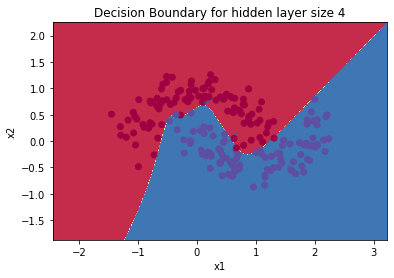

In [267]:
# Construir un modelo con una capa oculta de n_h dimensiones
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Trazar el límite de decisión
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [268]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 97%


**Resultados esperados**: 

<table style="width:30%">
  <tr>
    <td><b>Accuracy</b></td>
    <td> 90% </td> 
  </tr>
</table>

La precisión es realmente alta en comparación con la Regresión Logística. El modelo ha aprendido los patrones de los pétalos de la flor. A diferencia de la regresión logística, las redes neuronales son capaces de aprender incluso límites de decisión muy poco lineales. 

### Felicidades por haber terminado esta tarea de programación. 

Aquí tienes un rápido resumen de todo lo que acabas de lograr: 

- Construir una red neuronal completa de clasificación de 2 clases con una capa oculta
- Has hecho un buen uso de una unidad no lineal
- Ha calculado la pérdida de entropía cruzada
- Ha implementado la propagación hacia delante y hacia atrás
- Ha visto el impacto de variar el tamaño de la capa oculta, incluyendo el sobreajuste.

Ha creado una red neuronal que puede aprender patrones. Un trabajo excelente. A continuación, hay algunos ejercicios opcionales para probar otros tamaños de capa oculta y otros conjuntos de datos. 

<a name='6'></a>
## 6 - Ajuste del tamaño de la capa oculta (ejercicio opcional)

Ejecute el siguiente código (puede tardar 1-2 minutos). Luego, observe los diferentes comportamientos del modelo para varios tamaños de capa oculta.

Accuracy for 1 hidden units: 86.5 %
Accuracy for 2 hidden units: 88.0 %
Accuracy for 3 hidden units: 96.0 %
Accuracy for 4 hidden units: 97.0 %
Accuracy for 5 hidden units: 97.0 %
Accuracy for 20 hidden units: 96.5 %
Accuracy for 50 hidden units: 97.0 %


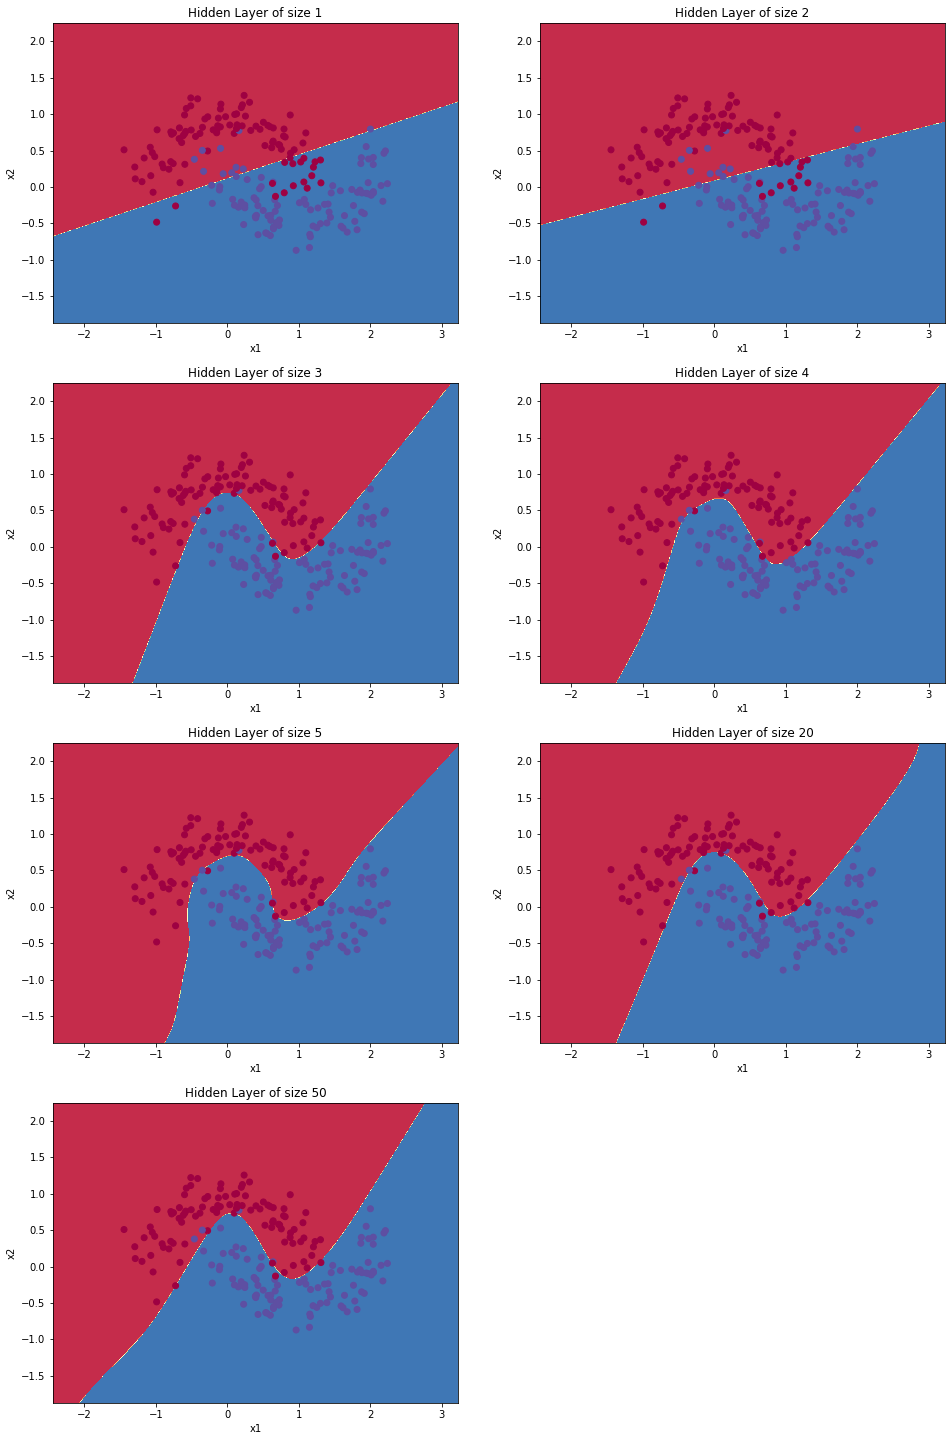

In [269]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretación**:
- Los modelos más grandes (con más unidades ocultas) son capaces de ajustarse mejor al conjunto de entrenamiento, hasta que finalmente los modelos más grandes se ajustan demasiado a los datos. 
- El mejor tamaño de capa oculta parece estar en torno a n_h = 5. De hecho, un valor en torno a este valor parece ajustarse bien a los datos sin incurrir en un sobreajuste notable.
- Más adelante, se familiarizará con la regularización, que le permite utilizar modelos muy grandes (como n_h = 50) sin un gran exceso de ajuste. 



**Algunas preguntas opcionales que puedes explorar si lo deseas**: 
- ¿Qué sucede cuando cambias la activación tanh por una activación sigmoidea o una activación ReLU?
- Juega con la tasa de aprendizaje. ¿Qué ocurre?
- ¿Qué pasa si cambiamos el conjunto de datos? (¡Vea la parte 7 más abajo!)

<a name='7'></a>
## 7- Rendimiento en otros conjuntos de datos

Si lo desea, puede volver a ejecutar todo el cuaderno (menos la parte del conjunto de datos) para cada uno de los siguientes conjuntos de datos.

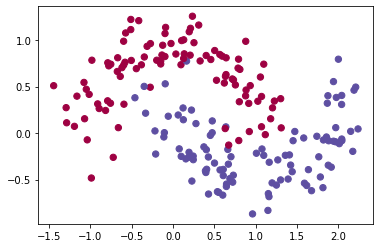

In [270]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

**References**:

- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/